<a href="https://colab.research.google.com/github/BIMCV-CSUSP/AnonymizationHackaton/blob/main/lab/HackathonDemo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


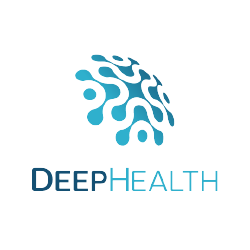 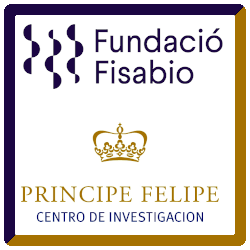 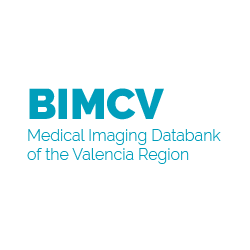

# MEDICAL DATA ANONYMIZATION HACKATHON

# Demo 3: Facial Anonymisation


---


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BIMCV-CSUSP/BIMCV-COVID-19/blob/master/padchest-covid/datasets.ipynb) 

In this demo we are going to work with some brain images and we will see two softwares that we can use for facial anonymisation. 

We are going to look at 2 of the softwares we have seen in Course 4:

1. MRI Defacer de FreeSurfer
2. Defacer (Deep Learning)

## Dataset Downloading


---



---


To work with these softwares we first need some example cases. We will download these examples from the following drive id. It will download a compressed file with the images we need.

In [ ]:
!gdown '1xRewZbQY9u-2VOiTBEpxVYb0Wzomr8gN'
!tar -xzf clean_data.tar.gz

## MRI Defacer de FreeSurfer


---



---


This [method](https://surfer.nmr.mgh.harvard.edu/fswiki/mri_deface) that we are going to use has the peculiarity that it uses an executable binary file and it is only available for use on *linux* or *Mac OS*. We will use the *Google Colaboratory* environment since their distro is Linux so everyone can use it. First let's download the files we need. These are:

1. **mri_deface**: This is the executable binary for linux. 
2. **talairach_mixed_with_skull.gca.gz**: It contains a generic brain MRI model in reference space. This particular space is called talairach space. It is referred to as a three-dimensional coordinate system of the human brain, which is used to map the location of brain structures independently of individual differences in the overall size and shape of the brain.
3. **face.gca.gz**: This file contains the generic mask in talairach space. This will be transformed into each native space of the images to be processed.

In [ ]:
!mkdir anonymisation_by_erasure
!wget https://surfer.nmr.mgh.harvard.edu/pub/dist/mri_deface/mri_deface_linux -O anonymisation_by_erasure/mri_deface
!wget https://surfer.nmr.mgh.harvard.edu/pub/dist/mri_deface/talairach_mixed_with_skull.gca.gz -O anonymisation_by_erasure/talairach_mixed_with_skull.gca.gz
!wget https://surfer.nmr.mgh.harvard.edu/pub/dist/mri_deface/face.gca.gz -O anonymisation_by_erasure/face.gca.gz


The next step, once the files have been downloaded, is to give permission to execute the binary file and extract the structures that are compressed.

In [ ]:
!chmod a+x anonymisation_by_erasure/mri_deface
!gunzip -f anonymisation_by_erasure/talairach_mixed_with_skull.gca.gz > anonymisation_by_erasure/talairach_mixed_with_skull.gca
!gunzip -f anonymisation_by_erasure/face.gca.gz > anonymisation_by_erasure/face.gca

The following video corresponds to a subject of our subset where, with a simple rendering, we would obtain this result where we can observe that his face is quite recognizable. This rendered subject has been obtained by the *3Dslicer* program.

In [ ]:
from IPython.core.display import Video
Video("/content/clean_data/2_normal.mp4", embed=True)

Having seen this picture, our objective would be as follows:

In [ ]:
Video("/content/clean_data/2_substract.mp4", embed=True)

Once we have seen how our target would look like, we are going to list the images we can work with and we are going to save them in a dictionary with the arguments we need to anonymise the images. In this case the **mri_deface** command that processes the image would be the following:


*   ./mri_deface <font color='red'> *\$source*</font> <font color='green'>talairach\_mixed\_with\_skull.gca</font> <font color=#9966FF> face.gca</font> <font color=#FF6600> \$dest</font>

Where it consists of the following arguments:


*   <font color='red'> *\$source*</font>: location of the image to be processed
*   <font color='green'> talairach\_mixed\_with\_skull.gca</font>: Head in Talairach space
*   <font color=#9966FF> face.gca</font>: Mask in Talairach space
*   <font color=#FF6600> \$dest</font>: Target file

Therefore we are going to store in a dictionary for each image, the variables <font color='red'> *\$source*</font> y <font color=#FF6600> \$dest</font>



In [ ]:
from pathlib import Path
dict_demo1 = {}
for files in Path("/content/clean_data").rglob("sub-*T1w.nii.gz"):
  dict_demo1[files.name] = {
      "source": files,
      "dest": files.parent.joinpath("substract_" + files.name)
  }
print(f"""example of image content:
  dict_demo1[{files.name}] = {{
    'source':{dict_demo1[files.name]["source"]},
    'dest':{dict_demo1[files.name]["dest"]}
  }}""")

Finally, the next cell contains a loop to execute all the images. In this case the loop goes through the dictionary and allows us to combine, thanks to the jupyter notebook, python code with bash.

In [ ]:
import os
import time
#raiz = os.getcwd()
#os.chdir(raiz + '/substract_annonimization/')
for image, values in dict_demo1.items():
  source = str(values["source"])
  #dest_folder = str(values["dest"].parent)
  dest = str(values["dest"])
  time1 = time.perf_counter()
  !./anonymisation_by_erasure/mri_deface $source ./anonymisation_by_erasure/talairach_mixed_with_skull.gca ./anonymisation_by_erasure/face.gca $dest > anonymisation_by_erasure/output.txt
  time2 = time.perf_counter()
  print(f"time to process {image} was {time2-time1} seconds")
  break # you will delete this line to process all images

In this case we have only processed the first image found in the dataset. If we would like to process the whole set of images we have to comment out the brake in the last line.

Now we can visualise the result in the next cell.

In [ ]:
!pip install nilearn
import nilearn
from nilearn import image, plotting
# view the last anonymisation image processed
img = image.load_img(dest)    
plotting.view_img(img, bg_img=False)

In this dynamic canvas we can see the mask applied to the image.

If you have processed all the images you will have noticed that one of the subjects has not been able to anonymise all his images because they do not contain the information about the positioning of the brain in the image. This makes it impossible for the software to anonymise it.

In the next cell we can list the images that have been anonymised and if you want you can visualise them with the previous cell.

In [ ]:
for files in Path("/content/drive/MyDrive/Hackathon/Curse4_Exercices/clean_data").rglob("substract_sub*T1w.nii.gz"):
  print (files)

## Defacer (Deep Learning)

---



---



Now let's go to the other anonymisation software. First we are going to install the libraries necessary for the code we are going to download to work.

In [ ]:
!pip install pydicom

Once installed, we are going to download the code. This code comes from the github of [yeonuk-Jeong](https://github.com/yeonuk-Jeong/Defacer) where part of the code has been modified to work with the tensorflow libraries installed in google colab

In [ ]:
!git clone https://github.com/josator2/Defacer.git

Cloning into 'Defacer'...
remote: Enumerating objects: 360, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 360 (delta 21), reused 0 (delta 0), pack-reused 306
Receiving objects: 100% (360/360), 181.79 MiB | 29.83 MiB/s, done.
Resolving deltas: 100% (180/180), done.


In the next cell we will change our current location <font color='red'>/content/</font> a <font color='green'>\/content\/Defacer\/model\_distribution </font>. This is done because the paths implemented in the modules are written to work at that directory level.

Once placed in this folder, we can import the Defacer module for use.



In [ ]:
import os

os.chdir(os.getcwd() + '/Defacer/model_distribution')
print(os.getcwd())

from model.defacer import Defacer

Let's now look at an example of one of our rendered subjects.


In [ ]:
Video("/content/clean_data/1_normal.mp4", embed=True)

And, therefore, the objective we are going to achieve will be the following animation:

In [ ]:
Video("/content/clean_data/1_deep.mp4", embed=True)

We can see how the eyes and mouth have been mondified by adding random pixels in the adjacent areas and removing pixels from the nose and ears.

Next we will see how we can do this. First we will list as in the previous exercise the images that can be anonymised. In this case the Defacer Class has two main functions:


*   Defacer.Deidentification_image_dcm(<font color='red'>where</font>,<font color='brue'>nfti_path</font>,<font color='green'>dest_path</font>,<font color='orange'>verif_path</font>,<font color=#9966FF>url</font>,<font color=#810F93>prefix</font>)
*   Defacer.Deidentification_image_nii(<font color='red'>where</font>,<font color='brue'>nfti_path</font>,<font color='green'>dest_path</font>,<font color='orange'>verif_path</font>,<font color=#9966FF>url</font>,<font color=#810F93>prefix</font>)



Where it consists of the following arguments:


* <font color='red'>where</font>: list or tuple. Each position stands where = (1,1,1,1) -> blur(eyes, nose, ears, mouth).
* <font color='blue'>nfti_path</font>:  path file where the image is stored
* <font color='green'>dest_path</font>:  path where the image will be stored
* <font color='orange'>verif_path</font>: path where the results of the anonymisation will be stored
* <font color=#9966FF>url</font>: This is the address to pass the download route
* <font color=#810F93>prefix</font>: prefix where the image will be renamed and stored.

Therefore we are going to generate a dictionary for each anonymisable image and store the necessary arguments for each of them.


In [ ]:
dict_demo_2 = {}
for files in Path("/content/clean_data").rglob("sub-*T1w.nii.gz"):
  #print(files)
  #defacer = Defacer()

  dict_args = {
    "where": (1,1,1,1,),
    "nfti_path": str(files) ,
    "dest_path": str(files.parents[0])+"/",
    "verif_path": str(files.parent.joinpath("verification"))+"/",
    "url": "localhost",
    "prefix": "anonymised",
  }
  dict_demo_2[files.name] = dict_args
print(f"""example of image content:
  dict_demo2[{files.name}] = {{
    'where':{dict_demo_2[files.name]["where"]},
    'nfti_path':{dict_demo_2[files.name]["nfti_path"]},
    'dest_path':{dict_demo_2[files.name]["dest_path"]},
    'verif_path':{dict_demo_2[files.name]["verif_path"]},
    'url':{dict_demo_2[files.name]["url"]},
    'prefix':{dict_demo_2[files.name]["prefix"]}
  }}""")

Finally we will process the images with the deidentification function.



In [ ]:
defacer = Defacer()
for subject, args_ in dict_demo_2.items():
  time1 = time.perf_counter()
  defacer.Deidentification_image_nii(**args_)
  time2 = time.perf_counter()
  print(f"time to process {subject} was {time2-time1:.5} seconds")
  break # you will delete this line to process all images
  

We can see that the selected parts have been correctly identified.

In [ ]:
nifti_path = Path(dict_demo_2[subject]["nfti_path"])
dest_file = nifti_path.parent.joinpath(dict_demo_2[subject]["prefix"]+"_"+subject)
img = image.load_img(str(dest_file))
plotting.view_img(img, bg_img=False)

This concludes the demo on facial anonymisation. Thanks❤.